<a href="https://colab.research.google.com/github/KeisukeShimokawa/CarND-Advanced-Lane-Lines/blob/master/machine-learning/tf2.0/TensorFlow2_0_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[https://github.com/YunYang1994/TensorFlow2.0-Examples](https://github.com/YunYang1994/TensorFlow2.0-Examples)

## 1. Introduction

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.1.0'

### Hello World

In [3]:
helloworld = tf.constant('hello, TensorFlow')
print("Tensor:", helloworld)
print("Value:", helloworld.numpy())

Tensor: tf.Tensor(b'hello, TensorFlow', shape=(), dtype=string)
Value: b'hello, TensorFlow'


### Variable

In [4]:
with tf.name_scope("my"):
    variable = tf.Variable(1)
print("tensor:", variable)
print("value:", variable.numpy())

tensor: <tf.Variable 'my/Variable:0' shape=() dtype=int32, numpy=1>
value: 1


In [5]:
variable = variable + 1
print("value:", variable.numpy())

value: 2


In [6]:
variable = tf.Variable(2)
variable.assign_add(1)
print("value:", variable.numpy())

value: 3


### Basic Operation

In [7]:
a = tf.ones([2,3])
print(a)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)


In [8]:
a = tf.Variable(a)
a[0,0].assign(10)
b = a.read_value()
print(b)

tf.Tensor(
[[10.  1.  1.]
 [ 1.  1.  1.]], shape=(2, 3), dtype=float32)


In [9]:
a = tf.constant(2)
b = tf.constant(3)

print("a + b :" , a.numpy() + b.numpy())
print("Addition with constants: ", a+b)
print("Addition with constants: ", tf.add(a, b))
print("a * b :" , a.numpy() * b.numpy())
print("Multiplication with constants: ", a*b)
print("Multiplication with constants: ", tf.multiply(a, b))

a + b : 5
Addition with constants:  tf.Tensor(5, shape=(), dtype=int32)
Addition with constants:  tf.Tensor(5, shape=(), dtype=int32)
a * b : 6
Multiplication with constants:  tf.Tensor(6, shape=(), dtype=int32)
Multiplication with constants:  tf.Tensor(6, shape=(), dtype=int32)


In [10]:
matrix1 = tf.constant([[3., 3.]])
matrix1

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[3., 3.]], dtype=float32)>

In [11]:
matrix2 = tf.constant([[2.],[2.]])
matrix2

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [2.]], dtype=float32)>

In [12]:
product = tf.matmul(matrix1, matrix2)
print("Multiplication with matrixes:", product)

Multiplication with matrixes: tf.Tensor([[12.]], shape=(1, 1), dtype=float32)


In [13]:
print("broadcast matrix in Multiplication:", matrix1 * matrix2)

broadcast matrix in Multiplication: tf.Tensor(
[[6. 6.]
 [6. 6.]], shape=(2, 2), dtype=float32)


In [14]:
a = tf.convert_to_tensor(2.)
b = tf.cast(a, tf.int32)
print(a, b)

tf.Tensor(2.0, shape=(), dtype=float32) tf.Tensor(2, shape=(), dtype=int32)


In [15]:
a = tf.ones([2,3])
print(a.shape[0], a.shape[1])

2 3


In [16]:
shape = tf.shape(a)           # a tensor
print(shape[0], shape[1])

tf.Tensor(2, shape=(), dtype=int32) tf.Tensor(3, shape=(), dtype=int32)


### Activation

In [19]:
# fake data
x = np.linspace(-5, 5, 100)
x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

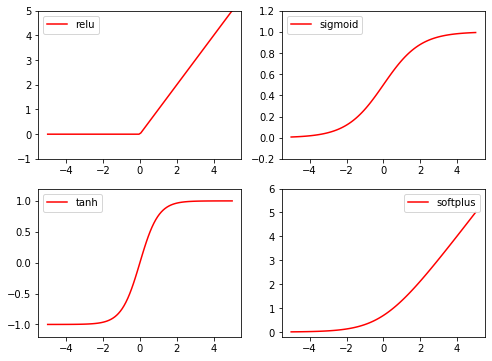

In [20]:
# following are popular activation functions
y_relu = tf.nn.relu(x)
y_sigmoid = tf.nn.sigmoid(x)
y_tanh = tf.nn.tanh(x)
y_softplus = tf.nn.softplus(x)
# y_softmax = tf.nn.softmax(x)  softmax is a special kind of activation function, it is about probability

# plt to visualize these activation function
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

In [0]:
??tf.nn.softplus

### GradientTape 

In [22]:
x = tf.constant(3.0)
with tf.GradientTape(persistent=True) as t:
    t.watch(x)               # Ensures that `tensor` is being traced by this tape.
    y = x * x
    z = y * y

dz_dx = t.gradient(z, x)  # 108.0 (4*x^3 at x = 3)
dy_dx = t.gradient(y, x)  # 6.0
print("dz/dx=", dz_dx.numpy())
print("dy/dx=", dy_dx.numpy())
del t  # Drop the reference to the tape

dz/dx= 108.0
dy/dx= 6.0


In [0]:
def f(x, y):
    output = 1.0
    for i in range(y):
        if i > 1 and i < 5:
            output = tf.multiply(output, x)
    return output

def grad(x, y):
    with tf.GradientTape() as t:
        t.watch(x)
        out = f(x, y)
    return t.gradient(out, x)

x = tf.convert_to_tensor(2.0)

assert grad(x, 6).numpy() == 12.0
assert grad(x, 5).numpy() == 12.0
assert grad(x, 4).numpy() == 4.0

## 2. Basic Models

### Linear Regression